In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
def df_maker(path,target_size=(64,64)):
    images = []
    sex = []
    for folder in os.listdir(path):
        print(f"Processing {folder}'s Faces")
        folder_path = os.path.join(path, folder)
        for file in tqdm(os.listdir(folder_path)):
            if file.endswith('.jpg'):
                img_path = os.path.join(folder_path,file)
                img = cv.imread(img_path,cv.IMREAD_GRAYSCALE)
                if img is not None:  
                    img.resize((target_size))
                    img = img.flatten()
                    images.append(img)
                    sex.append(folder)
    return pd.DataFrame({
        'image': images,
        'sex': sex
    })

In [3]:
df = df_maker('Training')
df_2 = df_maker('Validation')
df_3 =  df_maker('Training2')

Processing female's Faces


100%|██████████| 23243/23243 [00:10<00:00, 2253.86it/s]


Processing male's Faces


100%|██████████| 23766/23766 [00:31<00:00, 747.35it/s] 


Processing female's Faces


100%|██████████| 5841/5841 [00:02<00:00, 2881.44it/s]


Processing male's Faces


100%|██████████| 5808/5808 [00:01<00:00, 3395.21it/s]


Processing female's Faces


100%|██████████| 2698/2698 [00:32<00:00, 83.10it/s] 


Processing male's Faces


100%|██████████| 2720/2720 [00:24<00:00, 109.22it/s]


In [4]:

df = pd.concat([df,df_2,df_3])
df

,image,sex
0,"[39, 44, 45, 38, 46, 49, 51, 48, 64, 74, 74, 8...",female
1,"[12, 12, 9, 7, 9, 8, 5, 5, 8, 6, 6, 7, 9, 9, 8...",female
2,"[60, 53, 34, 47, 34, 26, 54, 36, 38, 46, 45, 4...",female
3,"[148, 150, 151, 152, 153, 157, 159, 159, 159, ...",female
4,"[89, 98, 115, 130, 133, 146, 169, 188, 197, 19...",female
...,...,...
5167,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",male
5168,"[231, 231, 231, 231, 232, 232, 232, 232, 232, ...",male
5169,"[227, 227, 227, 227, 227, 227, 227, 227, 227, ...",male
5170,"[205, 205, 205, 205, 205, 205, 205, 205, 206, ...",male


In [5]:
class Logistic_Regression:
    def __init__(self,learning_rate,epochs):
        self.w = None
        self.b = None
        self.epoch = epochs
        self.learning_rate = learning_rate
        self.costs = []

    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self,y,y_pred):
        return -(1/len(y)) * np.sum((y * np.log(y_pred)) + ((1-y) * np.log(1-y_pred)))
    
    def initialize_parameters(self,features_count):
        self.w = np.zeros(features_count)
        self.b = 0

    def update(self,X,y,y_pred):
        n = X.shape[0]

        dw = (1 / n) * np.dot((y_pred - y),X)
        db = (1 / n) * np.sum(y_pred - y)

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db
    
    def fit(self,X,y):
        features_count = X.shape[1]
        self.initialize_parameters(features_count)
        print("start training...")
        for i in tqdm(range(self.epoch)):
            z = np.dot(X,self.w) + self.b
            y_prediction = self.sigmoid(z)

            cost = self.cost(y,y_prediction)
            self.costs.append(cost)

            self.update(X,y,y_prediction)

    def predict(self,X):
        z = np.dot(X,self.w) + self.b
        y_prediction = self.sigmoid(z)
        y_pred_class = [1 if pred > 0.5 else 0 for pred in y_prediction]
        return np.array(y_pred_class)
    
    def plot_cost(self):
        plt.plot(range(self.epoch), self.costs)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost (Log-Loss)")
        plt.title("Cost Reduction over Iterations")
        plt.show()
    

In [6]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
x = np.array(df.image.tolist())
y = df.sex.values
x

array([[ 39,  44,  45, ..., 180, 179, 176],
       [ 12,  12,   9, ..., 101, 111, 132],
       [ 60,  53,  34, ..., 188, 187, 187],
       ...,
       [227, 227, 227, ...,  59,  62,  64],
       [205, 205, 205, ...,  34,  29,  31],
       [  7,   8,  10, ...,   9,   9,  10]], dtype=uint8)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle = True,random_state = 42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

start training...


100%|██████████| 10000/10000 [30:01<00:00,  5.55it/s]


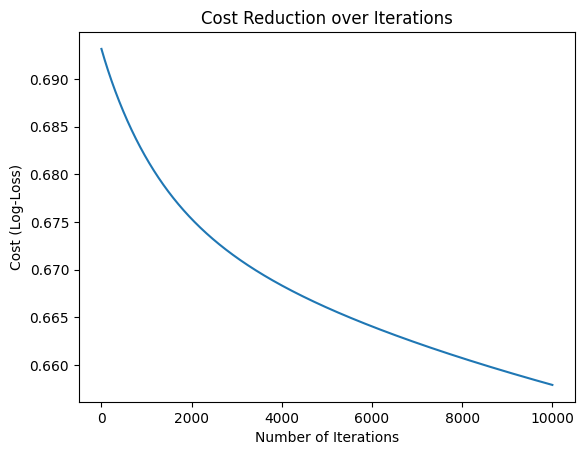

0.6182829390568698

In [8]:
from sklearn.metrics import accuracy_score
model = Logistic_Regression(0.00001,10000)
model.fit(x_train,y_train)

model.plot_cost()
y_pred = model.predict(x_test)

accuracy_score(y_test,y_pred)